Library is God

https://ajienotes.blogspot.com/2022/01/logistic-regression.html

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

on a linear data


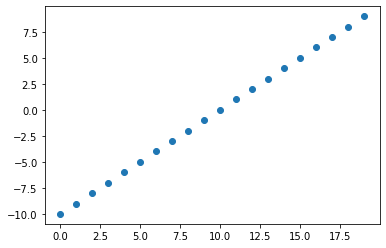

In [3]:
x = np.array(range(0,20))
y = np.array(range(-10,10))
plt.scatter(x,y)

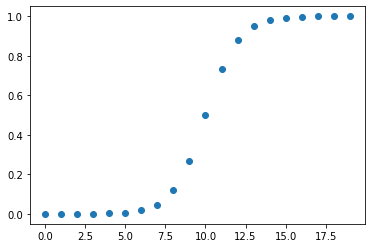

In [4]:
x = np.array(range(0,20))
y = np.array(range(-10,10))
y = 1/(1+np.exp(y*(-1)))
plt.scatter(x,y)

On a Random Data

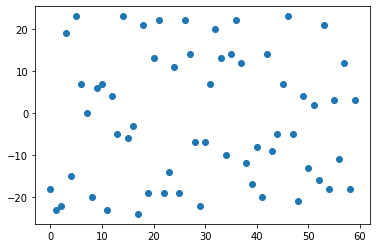

In [5]:
x = np.array(range(0,60))
y = np.random.randint(-24, 24, size=60)
plt.scatter(x,y)

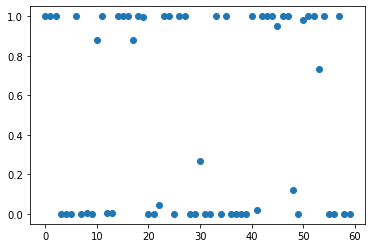

In [6]:
x = np.array(range(0,60))
y = np.random.randint(-24, 24, size=60)
y = 1/(1+np.exp(y*(-1)))
plt.scatter(x,y)

COST FUNCTION

C:\Users\ajiek\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\ajiek\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


when prediction is 0 but real value 1,  inf
when prediction is 1 and real value 1,  -0.0


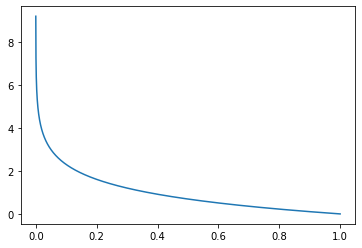

In [7]:
# real Y is 1
x = np.linspace(0,1,10000)
y = np.linspace(0,1,10000)
cost = -1*(np.log(y))
plt.plot(x,cost)
print("when prediction is 0 but real value 1, ", -1*(np.log(0)))
print("when prediction is 1 and real value 1, ", -1*(np.log(1)))

C:\Users\ajiek\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\ajiek\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


when prediction is 0 and real value 0,  -0.0
when prediction is 1 but real value 0,  inf


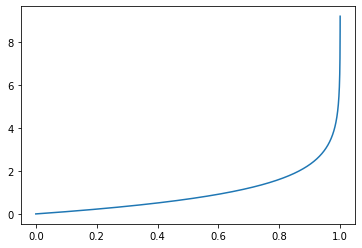

In [8]:
# real Y is 0
x = np.linspace(0,1,10000)
y = np.linspace(0,1,10000)
cost = -1*(np.log(1-y))
plt.plot(x,cost)
print("when prediction is 0 and real value 0, ", -1*(np.log(1-0)))
print("when prediction is 1 but real value 0, ", -1*(np.log(1-1)))

Combining this function we get

J = (1-Y)*((-1)*np.log(X))+(Y)*((-1)*np.log(1-X))

let say we have some data

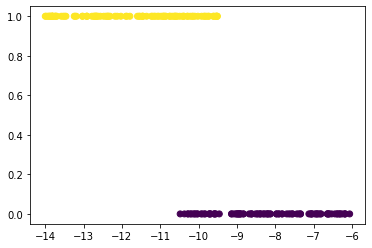

In [123]:
numberofData = 100
bias = np.ones(numberofData*2)
x = np.append(np.random.uniform(-14,-9.5, size=numberofData),np.random.uniform(-10.5,-6, size=numberofData))
x = np.transpose(np.array([bias,x]))
y = np.append(np.ones(numberofData),np.zeros(numberofData))
plt.scatter(x[:,1], y, c = y)

and we define a random theta and plot it, as we can see the cost is etremly high because it does not represent the right answer

2178.6546406408843


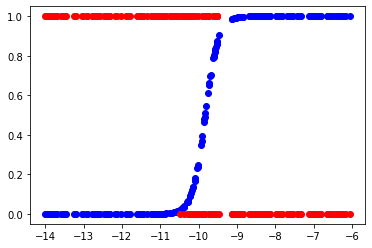

In [127]:
zplot = np.dot(x,[59,6])
yplot = 1/(1+np.exp(-zplot))
print(cost(yplot, y))
plt.scatter(x[:,1], yplot, c = 'blue')
plt.scatter(x[:,1], y, c = "red")

and this is another theta that represent better, with cost function comparatively low

50.23981312451144


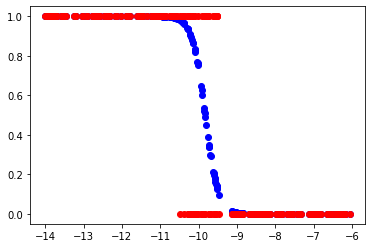

In [128]:
zplot = np.dot(x,[-59, -6])
yplot = 1/(1+np.exp(-zplot))
print(cost(yplot, y))
plt.scatter(x[:,1], yplot, c = 'blue')
plt.scatter(x[:,1], y, c = "red")

Overall function to run logistic regression

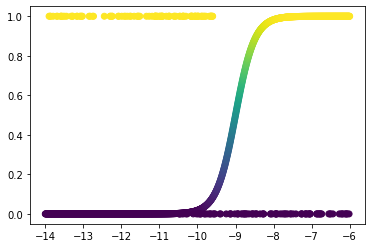

In [136]:
#plot random theta
x = np.transpose(np.array([np.ones(1000),np.linspace(-14,-6,1000)]))
z = np.dot(x,[36,4])
y = 1/(1+np.exp(-z))
plt.scatter(x[:,1], y, c = y)

#i create my own artificial dataset to demonstate the learning process
numberofData = 100
bias = np.ones(numberofData*2)
x = np.append(np.random.uniform(-14,-9.5, size=numberofData),np.random.uniform(-10.5,-6, size=numberofData))
x = np.transpose(np.array([bias,x]))
y = np.append(np.ones(numberofData),np.zeros(numberofData))
plt.scatter(x[:,1], y, c = y)

In [5]:
def cost(prediction, y):
    return np.sum(((y)*((-1)*np.log(prediction)))+((1-y)*((-1)*np.log(1-prediction))))

0 [36, 4]
1000 [-5.1484414  -0.24935124]
2000 [-24.48900991  -3.33515569]
3000 [-30.96225729  -3.67311807]
4000 [-33.82301126  -3.84875241]
5000 [-35.54223647  -3.96527035]
6000 [-36.73676272  -4.05164993]
7000 [-37.63350682  -4.11890864]
8000 [-38.33714575  -4.17283407]
9000 [-38.90477617  -4.2169253 ]


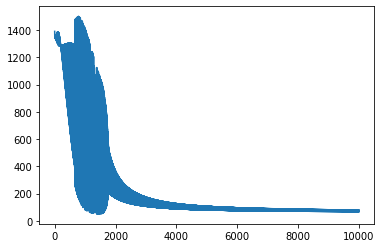

In [137]:
iteration = 10000
theta = [36,4]
alpha = 0.4

costs = [] #save cost every iteration
m = len(y) #number of dataset
for i in range(iteration):
    if i%1000==0:
        print(i,theta)
    z = np.dot(x,theta)
    prediction = 1/(1+np.exp(-z))
    error = prediction-y
    result = (alpha * (1/m)) * np.dot(np.transpose(x),error)
    theta = theta - result
    
    costs.append(cost(prediction,y))

plt.plot(np.array(range(len(costs))),costs)

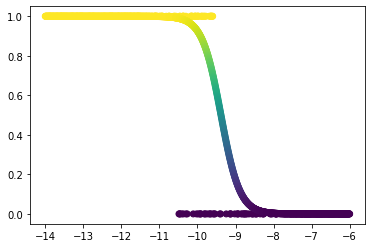

In [138]:
plt.scatter(x[:,1], y, c = y)

#plot theta generated from learning
x = np.transpose(np.array([np.ones(1000),np.linspace(-14,-6,1000)]))
z = np.dot(x,[-38.10750977, -4.0616511])
y = 1/(1+np.exp(-z))
plt.scatter(x[:,1], y, c = y)

you can also see the visualization here https://ajienotes.blogspot.com/2022/01/logistic-regression.html

Lets try solve 2d binary problem

In [3]:
df = pd.read_excel('binary2d.xlsx')

In [4]:
def procesexel(df):
    npdf = np.array(df)
    npdf0 = np.where(npdf==0)
    npdf1 = np.where(npdf==1)
    a0 = npdf0[0]
    b0 = npdf0[1]
    a1 = npdf1[0]
    b1 = npdf1[1]
    x1 = np.append(a0,a1)
    x2 = np.append(b0,b1)
    y = np.append(np.zeros(391),np.ones(69))
    index = np.array([x1,x2,y])
    index = np.transpose(index)
    return index
index = procesexel(df)

The Data looks like this

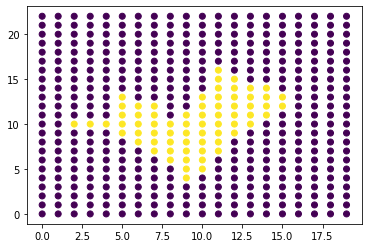

In [5]:
plt.scatter(index[:,0], index[:,1], c = index[:,2])

Plot with random theta

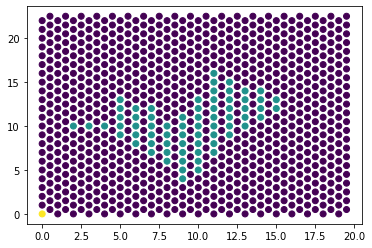

In [45]:
cplot = index[:,2]*(1/2)
cplot[0] = 1
plt.scatter(index[:,0], index[:,1], c = cplot)
x = index[:,0:2]
x = np.transpose([np.ones(460), x[:,0], x[:,1], x[:,0]*x[:,1], x[:,0]*x[:,0], x[:,1]*x[:,1]])
theta = [0,0,0,0,0,0]
z = np.dot(x,theta)
z = -z
z = np.exp(z)
prediction = 1/(1+z)
for i in range(len(prediction)):
    if prediction[i]>0.5:
        prediction[i]=1
    else: prediction[i]=0

plt.scatter(index[:,0]+0.5, index[:,1]+0.5, c = prediction)


Training

0 [0, 0, 0, 0, 0, 0]
1000 [ 0.00779799  0.18712027  0.23704206  0.09535707 -0.11362861 -0.11434553]
2000 [-0.01735107  0.24110096  0.31770506  0.14778682 -0.11198163 -0.10661004]
3000 [-0.04840055  0.27043186  0.36795824  0.17082496 -0.10605356 -0.09900381]
4000 [-0.08488843  0.27386596  0.38819508  0.16037509 -0.13415078 -0.12992713]
5000 [-0.12227955  0.27232708  0.40154364  0.17571126 -0.12044925 -0.11487414]
6000 [-0.15982785  0.26836761  0.41097422  0.17549265 -0.12035189 -0.11543296]
7000 [-0.19712606  0.26425272  0.4190533   0.16288483 -0.13183241 -0.12898693]
8000 [-0.2341345   0.26137623  0.427379    0.17046602 -0.12390335 -0.12036966]
9000 [-0.27050485  0.26091413  0.43732437  0.18148039 -0.11159993 -0.10736554]
10000 [-0.30713136  0.25724105  0.44290494  0.17318278 -0.11927769 -0.11650681]
11000 [-0.34299793  0.25712467  0.45147022  0.18054004 -0.11077235 -0.10744013]
12000 [-0.37880346  0.25555474  0.45774335  0.17251408 -0.11787245 -0.1157669 ]
13000 [-0.4143081   0.254863

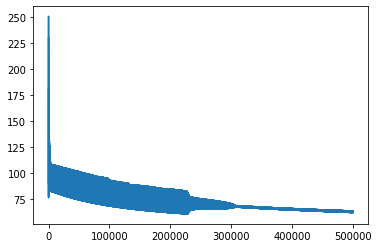

In [46]:
x = index[:,0:2]
x = np.transpose([np.ones(460), x[:,0], x[:,1], x[:,0]*x[:,1], x[:,0]*x[:,0], x[:,1]*x[:,1]])
y = index[:,2]
iteration = 500000
theta = [0,0,0,0,0,0] #[x1,x2,x1x2,x1^2,x2^2,               x1^2x2,x2^2x1]
alpha = 0.006

costs = [] #save cost every iteration
m = len(y) #number of dataset
for i in range(iteration):
    if i%1000==0:
        print(i,theta)
    z = np.dot(x,theta)
    z = -z
    z = np.exp(z)
    prediction = 1/(1+z)
    error = prediction-y
    result = (alpha * (1/m)) * np.dot(np.transpose(x),error)
    theta = theta - result
    costs.append(np.sum(np.abs(error)))

plt.plot(np.array(range(len(costs))),costs)

Result

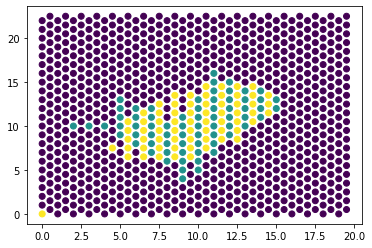

In [43]:
cplot = index[:,2]*(1/2)
cplot[0] = 1
plt.scatter(index[:,0], index[:,1], c = cplot)
x = index[:,0:2]
x = np.transpose([np.ones(460), x[:,0], x[:,1], x[:,0]*x[:,1], x[:,0]*x[:,0], x[:,1]*x[:,1]])
theta = [-6.95103246,  0.65734306,  1.16477159,  0.10737017, -0.09415707, -0.10855022]
z = np.dot(x,theta)
z = -z
z = np.exp(z)
prediction = 1/(1+z)
for i in range(len(prediction)):
    if prediction[i]>0.5:
        prediction[i]=1
    else: prediction[i]=0

plt.scatter(index[:,0]+0.5, index[:,1]+0.5, c = prediction)

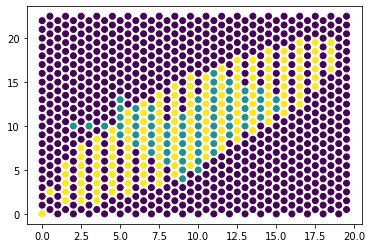

In [49]:
cplot = index[:,2]*(1/2)
cplot[0] = 1
plt.scatter(index[:,0], index[:,1], c = cplot)
x = index[:,0:2]
x = np.transpose([np.ones(460), x[:,0], x[:,1], x[:,0]*x[:,1], x[:,0]*x[:,0], x[:,1]*x[:,1]])
theta = [-0.44960181,  0.254164 ,   0.47018151,  0.17958792, -0.10993262, -0.10762966]
z = np.dot(x,theta)
z = -z
z = np.exp(z)
prediction = 1/(1+z)
for i in range(len(prediction)):
    if prediction[i]>0.5:
        prediction[i]=1
    else: prediction[i]=0

plt.scatter(index[:,0]+0.5, index[:,1]+0.5, c = prediction)